### K-Means Clustering 1
-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Overview of K-Means Clustering

Consider the following
1. Say your are given N data points.  These can be points in the x-y plane

2. Next, you are group these N data points into K groups (also called clusters)

3. Each data point will belong to one, and only one group (or cluster)

4. Each cluster will have a centroid (or center of gravity)

5. The goal is to make sure that each point is in the group that has the closest centroid (or center of gravity).  

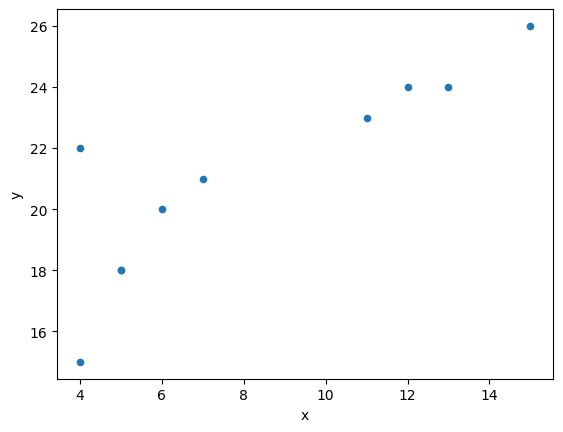

In [1]:
%matplotlib inline
import pandas as pd
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 18, 24, 23]

df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter(x='x', y='y')

### This seems simple enough!

### However, consider this...

Say, you have more points and more groups
1. Then, you realize that one point in group 4 needs to move to group 5
    - This is because group 5 has a center of gravity closer to this point
2. Now, you've modified the center of gravity for both group 4 and group 5!
    - Now, you have to check all the points in groups 4 and 5 to make sure they are all still in the right group!
    - And if any of them move to a different group, that will further change centers of gravity
3. In other words, any change that you make to a point (moving it from one group to another group), could affect every other point!  


Overall, solving this problem exactly is NP-hard, which means that solving this problem exactly is too computationally expensive.

But, we have the K-Means algorithm to help us get reasonable approximate solutions

### More formally, the K-Means algorithm does the following.

We have a set of points, $x_1, x_2, x_3, \dots, x_N$.  And we want to find K groups (clusters) called $S_0, S_1, S_2, \dots, S_K$ that satisfy the following

$$ \arg \min_S \sum^k_{i=1} \sum_{x \in S_i} | x - \mu_i |^2 $$

where $\mu_i$ is the centroid, or center of gravity for group (cluster) $S_i$

$$ \mu_i = \frac{1}{|S_i|} \sum_{x \in S_i} x .$$

The notation $| S_i |$ refers to the size, or number of points in $S_i$, and $| x - \mu_i |$ is the distance between point $x$ and centroid $\mu_i$.

==> This explanation is here for completeness.  Make sure that you at least develop some intuition for the K-Means algorithm.

### Learning Goals
- Learn the basics of the K-Means algorithm
- Learn how to apply the K-Means algorithm and visualize the results
- Learn how to use the "elbow" test to determine how many groups (or clusters) are needed

### Luckily, we don't have to implement or write the K-Means algorithm!  

### It's so popular, that we can just import an existing library implementation

In [2]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd


### To begin, let's look at our sample set of points below

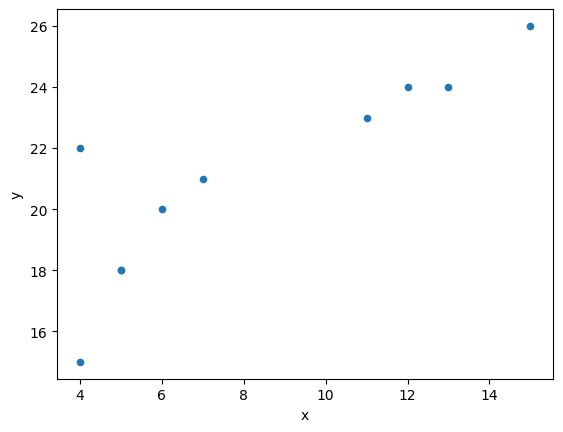

In [3]:
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 18, 24, 23]
df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter(x='x', y='y')

### Next, let's look at  a simple coloring of the points 
- Not using K-Means yet.  
- We're just coloring naively, with no thought
- Note how the list `c` has the same length as `x` and `y`.  It contains the color for each point

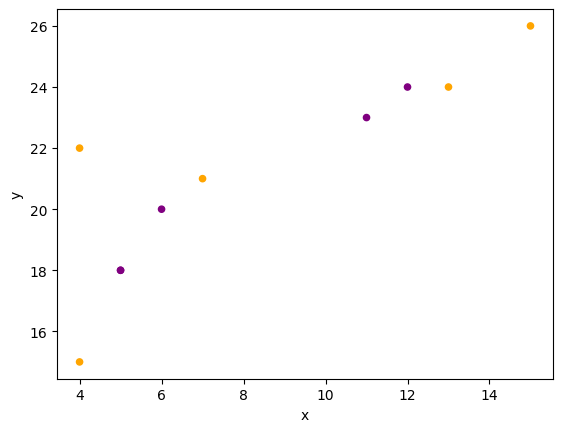

In [4]:
# scatter with color list, showing them how to do that
c = ['orange', 'purple', 'orange', 'purple', 'orange', 'purple', 'orange', 'purple', 'orange', 'purple']
ax = df.plot.scatter(x='x', y='y', c=c)

### But this doesn't look very good! 

### The yellow points are group 1, and the purple points are group 2

### The points close together are NOT grouped together!

### Let's apply K-Means

### However, first for K-Means, we need to get our data in the right format

### Task:  create a new list called `data` that combines `x` and `y` to look like this 

     print(data) 
     
     [(4, 22), (6, 20), (7, 23), (5, 18), (4, 15), (12, 24), (15, 26), (5, 18), (13, 24), (11, 23)]


In [5]:
## Solution file Only
#
data = list(zip(x, y))
print(data)

[(4, 22), (6, 20), (7, 21), (5, 18), (4, 15), (12, 24), (15, 26), (5, 18), (13, 24), (11, 23)]


### Now, we can run K-Means

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)


KMeans(n_clusters=2)

### Print your output

Your output should be either

     [0 0 0 0 0 1 1 0 1 1]

Or

     [1 1 1 1 1 0 0 1 0 0]

In [7]:
print(kmeans.labels_)

[1 1 1 1 1 0 0 1 0 0]


### The output of K-Means can change!
- K-Means always starts with random initial guesses to the groups of points.
- So, each time you run K-Means, you might get a different answer

### Let's examine the labels in more detail

1. We execute K-Means as follows

        kmeans = KMeans(n_clusters=2)
        kmeans.fit(data)

2. And then the labels are located here

        kmeans.labels_

3. Point 0 is in cluster `kmeans.labels_[0]`.  Point 1 is in cluster `kmeans.labels_[1]`, and so on.   

4. So if 

        kmeans.labels_ = [1 1 1 1 1 0 0 1 0 0]

   Then, points 0, 1, 2, 3, 4, and 7 are in the same cluster.  Points 5, 6, 8 and 9 are in the other.

### Note regarding clusters:

It doesn't matter if `0, 1, 2, 3, 4, and 7` are in cluster 0 and `5, 6, 8 and 9` are in cluster 1.  

Or the flip, if `0, 1, 2, 3, 4, and 7` are in cluster 1 and `5, 6, 8 and 9` are in cluster 0.  

All that matters is that they are in different clusters, because these points form different groupings.

### Task: Create a list that prints out each point and it's group (cluster number)

Your output should look like this

        point: (4, 22) is in group 0
        point: (6, 20) is in group 0
        point: (7, 21) is in group 0
        point: (5, 18) is in group 0
        point: (4, 15) is in group 0
        point: (12, 24) is in group 1
        point: (15, 26) is in group 1
        point: (5, 18) is in group 0
        point: (13, 24) is in group 1
        point: (11, 23) is in group 1
        
        
Or the flip,

        point: (4, 22) is in group 1
        point: (6, 20) is in group 1
        point: (7, 21) is in group 1
        point: (5, 18) is in group 1
        point: (4, 15) is in group 1
        point: (12, 24) is in group 0
        point: (15, 26) is in group 0
        point: (5, 18) is in group 1
        point: (13, 24) is in group 0
        point: (11, 23) is in group 0

In [8]:
# Solution file only

for i in range(10):
    point = data[i]
    label = kmeans.labels_[i]
    print("point:", point, "is in group", label)

point: (4, 22) is in group 1
point: (6, 20) is in group 1
point: (7, 21) is in group 1
point: (5, 18) is in group 1
point: (4, 15) is in group 1
point: (12, 24) is in group 0
point: (15, 26) is in group 0
point: (5, 18) is in group 1
point: (13, 24) is in group 0
point: (11, 23) is in group 0


### Task.  Next, we need to generate an informative plot.  

### Create a list `c` that equals 

    ['orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'purple', 'orange', 'purple', 'purple']
    
Or

    ['purple', 'purple', 'purple', 'purple', 'purple', 'orange', 'orange', 'purple', 'orange', 'orange']

where entry k of the list equals `colors[ kmeans.labels_[k] ]`.  

That is  `c[k]` should equal `colors[ kmeans.labels_[k] ]`.

In [9]:
## Solution File Only
#
colors = [ 'orange', 'purple']
c = [colors[k] for k in kmeans.labels_]

### Task: Now, do a scatter plot with your new list `c`

You should get a picture like (or possibly with the colors flipped)

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter.png" width="450">

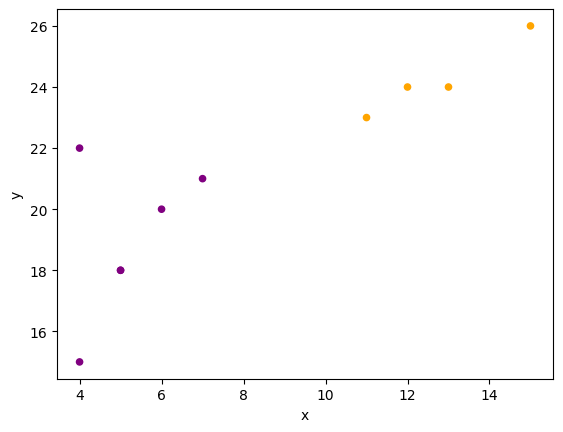

In [10]:
## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)

### Remember, that each cluster has a center.  

### Lets take a look

In [11]:
center0 = kmeans.cluster_centers_[0]
center1 = kmeans.cluster_centers_[1]
print("center 0:", center0)
print("center 1:", center1)


center 0: [12.75 24.25]
center 1: [ 5.16666667 19.        ]


### Now, we plot our centers.

After a scatter plot, you can still put new information in your plot using `ax`.  For instance, to plot center 0 in orange, you would do

        ax.plot(center0[0], center0[1], 'x', c='orange')
        
Task: Insert code in below cell to do both a scatter plot, and plot the centers
 - Plot center 0 in the correct color (orange or purple)
 - Plot center 1 in the correct color (orange or purple)

You should get a picture like 
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_scatter_w_centroid.png" width="450">

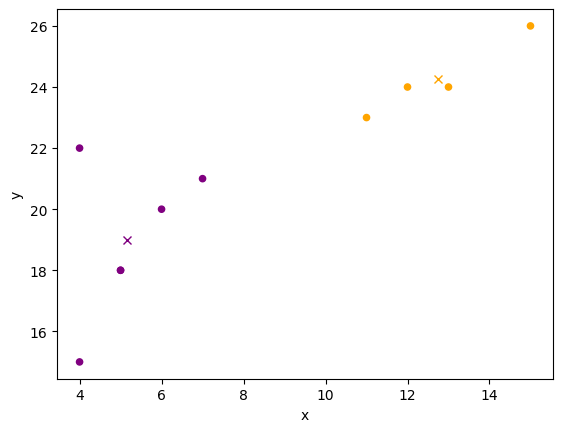

In [12]:
## Solution file only
# 
ax = df.plot.scatter(x='x', y='y', c=c)
ax.plot(center0[0], center0[1], 'x', c='orange')
ax.plot(center1[0], center1[1], 'x', c='purple')

### Inertia with K-Means

- Inertia is the sum of the distance between every point in a cluster and the centroid

- What do you think a good value for inertia is for a cluster?  Large or small?

- What happens if we go from 2 clusters to 3 clusters and inertia doesn't change much?

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia2.png" width="450">

### We want small inertias

### A small inertia means that all the points are close to their group's center

### If going from K groups to K+1 groups doesn't change the inertia much, then we have enough groups.


### Task: Run the below code cell.  It generates K-Means clusters from 1 cluster to 10 clusters, and then stores the inertia in a list `inertias`

### Task: Convert `inertias` to a dataframe and generate a plot that looks like this
- Make sure to give title and xlabel and ylabel

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia1.png" width="450">



In [13]:
## Ignore warnings, we're just exploring
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[Text(0.5, 1.0, 'K-Means Inertia'),
 Text(0.5, 0, 'Number of Groups'),
 Text(0, 0.5, 'Inertia')]

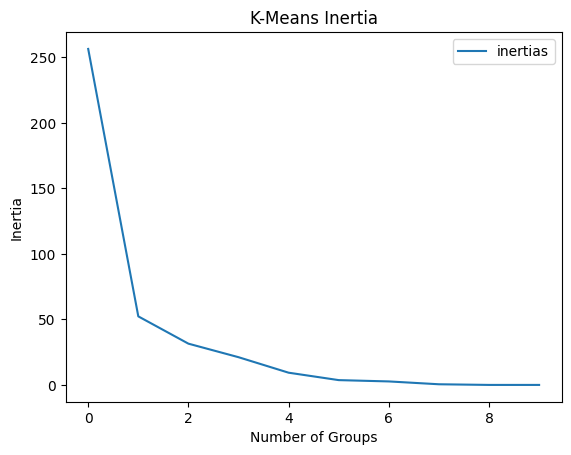

In [14]:
## Solution file only
#
df_inertia = pd.DataFrame({'inertias': inertias})
ax = df_inertia.plot(kind='line', style=['-'])
ax.set(title="K-Means Inertia", xlabel="Number of Groups", ylabel="Inertia" )


### Task: How many groups (clusters) do you think you need?

### Does going from 2 groups to 3 groups, or from 3 groups to 4 groups lower the inertia by much?

### Insert your discusion in the below cell using this template


Application of a Quantitative Model: K-Means
- Describe the model used (K-Means)
- What is K-means.  How does K-Means work?  
- What do we use K-Means for?  To quantitatively analyze data...
- Plot your data after K-Means to show the application of the model
  - Possibly plot for various numbers of clusters
  - Show and discuss elbow plot
  - Show that you've explored the model


insert discussion

In [16]:
# House cleaning part 1
# IMPORT CLUSTERING 2
from urllib.request import urlretrieve
(file, message) = urlretrieve('https://raw.githubusercontent.com/jbschroder/CS108/main/second_semester_half/notebooks5_kmeans/loan_clustering2.csv', 'loan_clustering2.csv')
print("You downloaded the file " + file)

You downloaded the file loan_clustering2.csv


### take a look at the file
...does ...

### explain our goal of loan prediction...see below

In [17]:
data=pd.read_csv("loan_clustering2.csv", comment='#')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y


### Plot it without groups/clusters, something like income vs. Y/N o

### Explain multi-D distance

### Task:  Do K-Means on it

need to only use numeric information like

Task create a new data_numeric that selects these columns
  Insert...


TASK???  Choose subcolumns without loan amount or term for more predictivity?

In [18]:
data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]



In [19]:
## Solution File Only
# 

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_numeric)
    inertias.append(kmeans.inertia_)

Task: Just get to elbow plot and stop...

[Text(0.5, 1.0, 'K-Means Inertia'),
 Text(0.5, 0, 'Number of Clusters'),
 Text(0, 0.5, 'Inertia')]

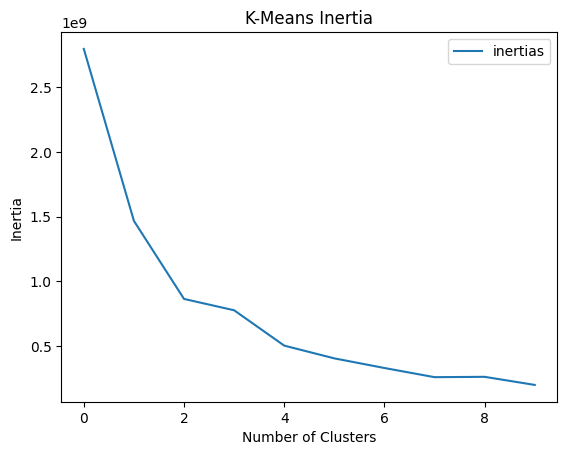

In [20]:
## Solution file only
#
df_inertia = pd.DataFrame({'inertias': inertias})
ax = df_inertia.plot(kind='line', style=['-'])
ax.set(title="K-Means Inertia", xlabel="Number of Clusters", ylabel="Inertia" )


Then for Monday, do the rest of the below...

choose number of clusters...


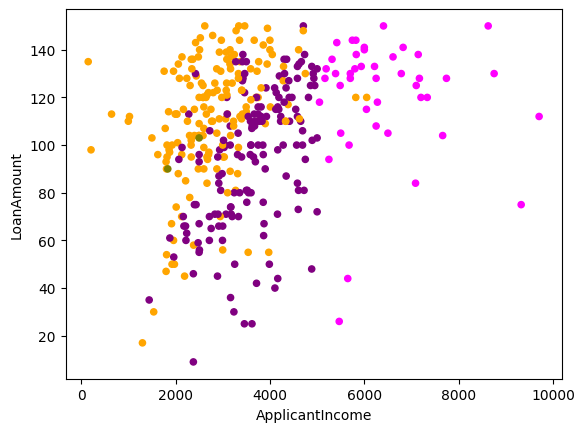

In [21]:
## Solution File Only
#

# 4 is a nice picture

# Choose 6 cluster from plot
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_numeric)

colors = [ 'orange', 'purple', 'olive', 'magenta', 'teal', 'red']
c = [colors[k] for k in kmeans.labels_]

#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
#ax = data.plot.scatter(x='ApplicantIncome', y='Loan_Status', c=c)
#ax = data.plot.scatter(x='Credit_History', y='Loan_Status', c=c)

# inco
ax = data.plot.scatter(x='ApplicantIncome', y='LoanAmount', c=c)



In [22]:
## Solution File Only
#

# choose subcolumns
#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


data_numeric = data[['Dependents', 'Credit_History']]

# For all the categoies to work, need to scale, SEE BELOW cell
#data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]


# Choose 6 cluster from plot
numclusters = 6

#kmeans = KMeans(n_clusters=numclusters, init='k-means++')
kmeans = KMeans(n_clusters=numclusters)
kmeans.fit(data_numeric)

for label in range(numclusters):
    number_yes = 0
    number_no = 0
    for i in range( data_numeric.shape[0]):
        if kmeans.labels_[i] == label:
            if data['Loan_Status'][i] == "N":
                number_no += 1
            elif data['Loan_Status'][i] == "Y":
                number_yes += 1

    print("Label: ", label)
    print("  num yes ", number_yes, )
    print("  num no ", number_no)
    print("")



Label:  0
  num yes  5
  num no  0

Label:  1
  num yes  148
  num no  33

Label:  2
  num yes  32
  num no  9

Label:  3
  num yes  3
  num no  59

Label:  4
  num yes  55
  num no  4

Label:  5
  num yes  21
  num no  1



In [23]:
## Solution File Only
#

# choose subcolumns
#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


#data_numeric = data[['Dependents', 'Credit_History']]

# For all the categoies to work, need to scale
data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# statistics of scaled data
pd.DataFrame(data_numeric_scaled).describe()


# Choose 6 cluster from plot
numclusters = 6

#kmeans = KMeans(n_clusters=numclusters, init='k-means++')
kmeans = KMeans(n_clusters=numclusters)
kmeans.fit(data_numeric_scaled)

for label in range(numclusters):
    number_yes = 0
    number_no = 0
    for i in range( data_numeric_scaled.shape[0]):
        if kmeans.labels_[i] == label:
            if data['Loan_Status'][i] == "N":
                number_no += 1
            elif data['Loan_Status'][i] == "Y":
                number_yes += 1

    print("Label: ", label)
    print("  num yes ", number_yes, )
    print("  num no ", number_no)
    print("")



Label:  0
  num yes  15
  num no  60

Label:  1
  num yes  17
  num no  0

Label:  2
  num yes  136
  num no  28

Label:  3
  num yes  52
  num no  3

Label:  4
  num yes  1
  num no  1

Label:  5
  num yes  43
  num no  14



In [24]:
print(data_numeric['Dependents'][ kmeans.labels_ == 0] )

10     1
11     0
14     0
15     2
27     0
      ..
355    1
356    1
360    2
364    0
369    0
Name: Dependents, Length: 75, dtype: int64


Note that you can identify clusters with attributes like

print(data_numeric['Dependents'][ kmeans.labels_ == 5] )


Have them do the above for various categories -- find this dependence on "Dependents" and "Credit History" 
- Basically, when you get lots of Nos and Yess to cluster, then you've found something predictive
- Going to have to experiment with number of clusters

     Show 6 clusters -- good for predicting/grouping based on whether you got loan
     Show just 2 or 3 -- not good for predicting

Is this enough to say that things are clustering? According to N or Y?

Have them Scale their results next time?  
- Note that scaling lets you find a no cluster when you use all the categories

Cheat Sheet:  More dependents and having a credit history should correlate with having a loan


### Originally from 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view?usp=sharing

Question here is to predict the Loan_Status depending on the Gender, marital status, the income of the customers, etc.  
- The ultimate goal would be a K-Means approach to grouping a new applicant. Which centroid are they closest to?
    - The people with loans, or without?
    - Make loan decision based on this.

1. Upload loan_clustering.csv to your git repo for easy downloading

2. Task: cluster and choose right number of clusters
 - You do in the solution, too
     - You need to check that the clusters are largely the same Y or N regarding the loan answer
 - Task for them is to figure this out on their own



3. You'll have to find a pattern in the clusters
--> Maybe instead scatter plot just one of the categories (with arange as the x-axis) and then color as before based on cluster
--> Maybe y-axis is Loan Y or N
--> Just do this to answer the above question graphically




K-Means project idea is then extensions of this...or of the below (move over to Latex)
- write multi-d distance function to predict new applicant
- more quanitatively measure how good your Y / N classification is.  Give percent correct metric for your clusters
- discuss more on the ethics of such an algorithm
- Scale data like, insert code https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- How would you  the string information in clustering, e.g.,  Urban/Rural, or marital status?



In [25]:
# House cleaning part 1
from urllib.request import urlretrieve
(file, message) = urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv', 'Wholesale_customer_data.csv')
print("You downloaded the file " + file)    

You downloaded the file Wholesale_customer_data.csv


### Project idea...

Download your own version, give credit to 
   https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
        
   clean out channel, 
   spell delicatessen, rename Fresh Produce, Milk, Other Groceries, Frozen Food, Detergent and Paper Goods, Delicatessen

Tell them to scale it like, take code from, 
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/  

Task: cluster and choose right number of clusters
 - You do in the solution, too

You'll have to find a pattern in the clusters, 
==> Maybe  scatter plot just one of the categories (with arange as the x-axis) and then color as before based on cluster
==> are incomes, or co-income, or marital status, predictive of a cluster?



In [26]:
data=pd.read_csv("Wholesale_customer_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Discussion template

Quantitative Information:  information represented numerically, i.e., represented with numbers.  This can include  anything that can be measured or counted to that it has a numerical value. https://www.nnlm.gov/guides/data-glossary/quantitative-data
    - The data that you use K-Means with is quantative data

Quantitative Models: models that help us understand and interpret our numerical (quantitative) data.  K-Means is a quantitative model.


1. Communication/Representation of Quantitative Information
    - Plot your data before and after K-Means
    - Possibly print your data to the screen, too, so that the reader knows what the data looks like in raw form

2. Application of Quantitative Models
    - Describe the model used (K-Means)
    - What is K-means.  How does K-Means work?  
    - What do we use K-Means for?  To quantitatively analyze data.
    - Plot your data after K-Means to show the application of the model
      - Possibly plot for various numbers of clusters
      - Show and discuss elbow plot
      - Show that you've explored the model


3. Conclusion -- Quantative Analysis
    - Discuss your scatter plots and any other results.  What did you find? 
    - What can you conclude?  
    - What is still unexplained? 
    - You are communicating and representing quantitative information
    
4. Ethical Reasoning
    - Now that you've seen how an actual algorithm for grouping people works, and how an algorithm might make decisions about people, it's time to consider the ethics of that. 
    
    - What are your thoughts regarding the use of algorithms to group people (e.g., for targeted marketing, or for loans, or other purposes)?
    
    - When is it ethical, when is it not?  What conditions would you like to see? 
    
    - There is no wrong answer here. 
    


Here are a few links to discussion on this issue from New Mexico, but there are many other articles on online on these topics. You're welcome to read / watch the below, or not.

  - https://www.santafe.edu/research/projects/algorithmic-justice
    
  - Video featuring UNM CS Professor Melanie Moses  https://www.youtube.com/watch?v=atVfp_zkkv4

  - https://www.sfreporter.com/news/2018/09/19/algorithms-and-ethics/
    


### In particular, here you want to focus on these questions
-  Insert specific things about this...


Discussion goes here

In [27]:
Are 

NameError: name 'Are' is not defined

### Homework Submission Instructions

### The homework submission instructions are different this week. 

### Download your notebook as an ".ipynb" file, and upload the ipynb file as your assignment to Canvas.

### Do not upload a .py file

In [ ]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd

##########

# complete the basic clustering
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 18, 24, 23]

data = list(zip(x, y))
df = pd.DataFrame({'x': x, 'y': y})

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

###########

colors = [ 'orange', 'purple', 'olive', 'magenta', 'teal', 'red']
c = [colors[k] for k in kmeans.labels_]

centroid0 = kmeans.cluster_centers_[0]
centroid1 = kmeans.cluster_centers_[1]

ax = df.plot.scatter(x='x', y='y', c=c, s=70)
ax.plot(centroid0[0], centroid0[1], 'x', c='orange', ms=8)
ax.plot(centroid1[0], centroid1[1], 'x', c='purple', ms=8)

# plot line between centroid and cluster
for (x1,y1,cluster) in zip(x,y,kmeans.labels_):
    ax.plot([x1, kmeans.cluster_centers_[cluster,0]],  [y1, kmeans.cluster_centers_[cluster,1]], '-k', linewidth=0.5)
